In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Change the working directory to a specific path
new_dir = '/content/drive/MyDrive/'
os.chdir(new_dir)

# Verify the change
current_dir = os.getcwd()
print("New Working Directory:", current_dir)


New Working Directory: /content/drive/MyDrive


In [ ]:
# install torch and other things
!pip install timm==1.0.3
!git clone https://github.com/Adamdad/rational_kat_cu.git
!pip install -e .
!git clone https://github.com/Adamdad/kat.git

fatal: destination path 'rational_kat_cu' already exists and is not an empty directory.
Obtaining file:///content/drive/MyDrive
ERROR: file:///content/drive/MyDrive does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
fatal: destination path 'kat' already exists and is not an empty directory.


In [ ]:
!ls /content/drive/MyDrive/kan_transformer

import sys
import os

repo_path = '/content/drive/MyDrive/kan_transformer'
sys.path.append(repo_path)



ls: cannot access '/content/drive/MyDrive/kan_transformer': No such file or directory


In [ ]:
import os

current_dir = os.getcwd()
print("Current Working Directory:", current_dir)

files = os.listdir(current_dir)
print("Files in the current directory:", files)


Current Working Directory: /content/drive/MyDrive
Files in the current directory: ['Ερμηνευτικό Σχόλιο (1).docx', 'Ερμηνευτικό Σχόλιο.docx', 'Αίτηση σελίδα 1 (1).doc', 'Αίτηση σελίδα 1 (1).gdoc', 'Αίτηση σελίδα 1.doc', 'Αίτηση σελίδα 1.gdoc', 'Το ύφος του κειμένου.pdf', 'Το ύφος του κειμένου.gdoc', 'Ερμηνευτικό Σχόλιο (1).gdoc', 'Ερμηνευτικό Σχόλιο.gdoc', 'ΕΚΘ Η αλληλεγγύη εκπέμπει.docx', 'ΕΚΘ Η αλληλεγγύη εκπέμπει.gdoc', 'ΑΝΑΖΗΤΕΙΤΑΙ ΜΙΑ ΚΑΛΗ ΕΙΔΗΣΗ.pdf', 'ΑΝΑΖΗΤΕΙΤΑΙ ΜΙΑ ΚΑΛΗ ΕΙΔΗΣΗ.gdoc', 'tipota.zip', 'PROGRESS TEST L.1-4 GRENT.pdf', 'PROGRESS TEST L.1-4 GRENT.gdoc', 'movies_metadata.csv', 'PrologIntro.ipynb', 'test_ratings.csv', 'train_ratings.csv', '.ipynb_checkpoints', '2ο Θέμα.ipynb', 'db.pl', 'ratings.csv', 'movies_metadata (1).csv', 'train-val.csv', 'foo.txt', 'Sample upload.txt', 'test (1).csv', 'folder', 'c', 'to_kaggle.csv', 'MM2023-24.LabProject1.ipynb', 'out.zip', 'test.csv', 'to_kaggle_1.zip', 'to_kaggle_2.zip', 'ML2023-24-hwk1.csv', 'Untitled.i

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/rational_kat_cu')
sys.path.append('/content/drive/MyDrive/kat')



In [ ]:
class Training:
    def __init__(self, model, train_loader, val_loader, optimizer, epochs, cp_path, device, overfit_batch=False):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.optimizer = optimizer
        self.epochs = epochs
        self.cp_path = cp_path
        self.device = device
        self.overfit_batch = overfit_batch

    def train_with_eval(self):
        print("Starting training...")
        for epoch in range(self.epochs):
            self.train_epoch(epoch)
            self.eval_epoch(epoch)
            # Save checkpoint
            torch.save(self.model.state_dict(), self.cp_path)

    def train_epoch(self, epoch):
        self.model.train()
        print(f"Training epoch {epoch + 1}/{self.epochs}")
        for batch_idx, (data, target) in enumerate(self.train_loader):
            data, target = data.to(self.device), target.to(self.device)
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = torch.nn.functional.cross_entropy(output, target)
            loss.backward()
            self.optimizer.step()
            if batch_idx % 100 == 0:
                print(f"Train Epoch: {epoch + 1} [{batch_idx * len(data)}/{len(self.train_loader.dataset)}"
                      f" ({100. * batch_idx / len(self.train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

    def eval_epoch(self, epoch):
        self.model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in self.val_loader:
                data, target = data.to(self.device), target.to(self.device)
                output = self.model(data)
                val_loss += torch.nn.functional.cross_entropy(output, target, reduction='sum').item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
        val_loss /= len(self.val_loader.dataset)
        print(f"\nValidation set: Average loss: {val_loss:.4f}, Accuracy: {correct}/{len(self.val_loader.dataset)}"
              f" ({100. * correct / len(self.val_loader.dataset):.0f}%)\n")


In [ ]:
from torch.utils.data import random_split

def torch_train_val_split(dataset, batch_train, batch_eval, val_split=0.2, seed=42):
    """
    Splits a dataset into training and validation sets and returns DataLoader instances.
    """
    train_size = int((1 - val_split) * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=torch.Generator().manual_seed(seed))

    train_loader = DataLoader(train_dataset, batch_size=batch_train, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_eval, shuffle=False)

    return train_loader, val_loader, None  # None for test_loader in this case


In [ ]:
!pip install kat_rational

ERROR: Could not find a version that satisfies the requirement kat_rational (from versions: none)
ERROR: No matching distribution found for kat_rational


In [ ]:
%cd /content/drive/MyDrive/kat


[Errno 2] No such file or directory: '/content/drive/MyDrive/kat'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os


new_dir = '/content/drive/MyDrive/'
os.chdir(new_dir)


current_dir = os.getcwd()
print("New Working Directory:", current_dir)

!pip install timm==1.0.3
!git clone https://github.com/Adamdad/rational_kat_cu.git
!pip install -e .
!git clone https://github.com/Adamdad/kat.git

New Working Directory: /content/drive/MyDrive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.14
    Uninstalling timm-1.0.14:
      Successfully uninstalled timm-1.0.14
fatal: destination path 'rational_kat_cu' already exists and is not an empty directory.
Obtaining file:///content/drive/MyDrive
ERROR: file:///content/drive/MyDrive does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
fatal: destination path 'kat' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/rational_kat_cu')
sys.path.append('/content/drive/MyDrive/kat')

In [ ]:
import time
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import os
import torch.nn as nn
import torch.nn.functional as F
from kat.katransformer import KATVisionTransformer, Block, KAN, PatchEmbed


torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

def torch_train_val_split(dataset, batch_train, batch_eval, val_split=0.2, seed=42):
    train_size = int((1 - val_split) * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(
        dataset, [train_size, val_size], generator=torch.Generator().manual_seed(seed)
    )
    train_loader = DataLoader(train_dataset, batch_size=batch_train, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_eval, shuffle=False)
    return train_loader, val_loader

BATCH_SIZE = 32
train_loader, val_loader = torch_train_val_split(dataset, BATCH_SIZE, BATCH_SIZE)


class Training:
    def __init__(self, model, train_loader, val_loader, optimizer, epochs, cp_path,
                 device, patience=10, scheduler=None):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.optimizer = optimizer
        self.epochs = epochs
        self.cp_path = cp_path
        self.device = device
        self.scheduler = scheduler
        self.patience = patience
        self.best_val_acc = 0
        self.counter = 0
        self.train_times = []
        self.val_accuracies = []

    def train_with_eval(self):
        total_start_time = time.time()

        for epoch in range(self.epochs):
            start_time = time.time()

            self.train_epoch(epoch)
            val_acc = self.eval_epoch(epoch)
            self.val_accuracies.append(val_acc)

            epoch_time = time.time() - start_time
            self.train_times.append(epoch_time)

            if self.scheduler:
                self.scheduler.step()

            if val_acc > self.best_val_acc:
                self.best_val_acc = val_acc
                self.counter = 0
                torch.save(self.model.state_dict(), self.cp_path)
                print(f"New best validation accuracy: {self.best_val_acc:.2f}%")
            else:
                self.counter += 1
                print(f"No improvement for {self.counter} epoch(s).")
                if self.counter >= self.patience:
                    print("Early stopping triggered.")
                    break

        total_train_time = time.time() - total_start_time
        avg_epoch_time = sum(self.train_times) / len(self.train_times)

        return avg_epoch_time, total_train_time, self.best_val_acc, self.val_accuracies

    def train_epoch(self, epoch):
        self.model.train()
        for data, target in self.train_loader:
            data, target = data.to(self.device), target.to(self.device)
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            self.optimizer.step()

    def eval_epoch(self, epoch):
        self.model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in self.val_loader:
                data, target = data.to(self.device), target.to(self.device)
                output = self.model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
        return 100. * correct / len(self.val_loader.dataset)


configs = [
    {'embed_dim': 60, 'depth': 2},
    {'embed_dim': 120, 'depth': 2},
    {'embed_dim': 60, 'depth': 4},
    {'embed_dim': 120, 'depth': 4},
]

results = []

for i, cfg in enumerate(configs):
    print(f"===== Starting run {i+1} with config: {cfg} =====")

    model_kat = KATVisionTransformer(
        img_size=28,
        patch_size=4,
        in_chans=1,
        num_classes=10,
        embed_dim=cfg['embed_dim'],
        depth=cfg['depth'],
        num_heads=4,
        mlp_ratio=2.0,
        pos_embed='learn',
        pre_norm=True,
        fc_norm=True,
        drop_rate=0.1,
        attn_drop_rate=0.1,
        drop_path_rate=0.1,
        weight_init='kan_mimetic',
        embed_layer=PatchEmbed,
        norm_layer=nn.LayerNorm,
        act_layer=nn.GELU,
        block_fn=Block,
        mlp_layer=KAN
    ).to(DEVICE)

    num_params = sum(p.numel() for p in model_kat.parameters() if p.requires_grad)
    print(f"Config {i+1} -> embed_dim: {cfg['embed_dim']}, depth: {cfg['depth']}, params: {num_params}")

    optimizer_kat = torch.optim.AdamW(model_kat.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler_kat = torch.optim.lr_scheduler.StepLR(optimizer_kat, step_size=30, gamma=0.1)

    cp_path_kat = f"./checkpoints_kat/kat_checkpoint_{cfg['embed_dim']}_{cfg['depth']}.pth"

    trainer_kat = Training(
        model=model_kat,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer_kat,
        epochs=20,
        cp_path=cp_path_kat,
        device=DEVICE,
        patience=10,
        scheduler=scheduler_kat
    )

    avg_epoch_time, total_train_time, best_val_acc, val_accuracies = trainer_kat.train_with_eval()

    results.append({
        'config': cfg,
        'num_params': num_params,
        'best_val_acc': best_val_acc,
        'avg_epoch_time': avg_epoch_time,
        'total_train_time': total_train_time,
        'val_accuracies': val_accuracies
    })



print("\n==================== Final Results ====================")
for i, res in enumerate(results):
    print(f"Run {i+1}: Config: {res['config']}")
    print(f"  Trainable Parameters: {res['num_params']}")
    print(f"  Best Validation Accuracy: {res['best_val_acc']:.2f}%")
    print(f"  Average Epoch Time: {res['avg_epoch_time']:.2f} sec")
    print(f"  Total Training Time: {res['total_train_time']:.2f} sec")
    print(f"  Accuracy per Epoch: {res['val_accuracies']}\n")

print("=========================================================")


Using device: cuda
===== Starting run 1 with config: {'embed_dim': 60, 'depth': 2} =====
Config 1 -> embed_dim: 60, depth: 2, params: 63942
New best validation accuracy: 66.24%
New best validation accuracy: 79.42%
New best validation accuracy: 85.03%
New best validation accuracy: 87.62%
No improvement for 1 epoch(s).
New best validation accuracy: 89.13%
New best validation accuracy: 91.05%
No improvement for 1 epoch(s).
New best validation accuracy: 92.01%
No improvement for 1 epoch(s).
No improvement for 2 epoch(s).
New best validation accuracy: 92.24%
New best validation accuracy: 92.28%
New best validation accuracy: 92.83%
New best validation accuracy: 92.90%
New best validation accuracy: 94.67%
No improvement for 1 epoch(s).
No improvement for 2 epoch(s).
No improvement for 3 epoch(s).
No improvement for 4 epoch(s).
===== Starting run 2 with config: {'embed_dim': 120, 'depth': 2} =====
Config 2 -> embed_dim: 120, depth: 2, params: 242922
New best validation accuracy: 73.73%
New bes

KeyboardInterrupt: 

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from kat.katransformer import KATVisionTransformer, Block, KAN, PatchEmbed


def test_model(model, test_loader, device):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n")

    return accuracy


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {DEVICE}')

configs = [
    {'embed_dim': 64, 'depth': 2},
    {'embed_dim': 128, 'depth': 2},
    {'embed_dim': 64, 'depth': 4},
    {'embed_dim': 128, 'depth': 4},
]

# Directory containing pretrained checkpoints
checkpoint_dir = "./checkpoints_kat"

results = []

for i, cfg in enumerate(configs):
    print(f"===== Evaluating model {i+1} with config: {cfg} =====")

    model_kat = KATVisionTransformer(
        img_size=28,
        patch_size=4,
        in_chans=1,
        num_classes=10,
        embed_dim=cfg['embed_dim'],
        depth=cfg['depth'],
        num_heads=4,
        mlp_ratio=2.0,
        pos_embed='learn',
        pre_norm=True,
        fc_norm=True,
        drop_rate=0.1,
        attn_drop_rate=0.1,
        drop_path_rate=0.1,
        weight_init='kan_mimetic',
        embed_layer=PatchEmbed,
        norm_layer=nn.LayerNorm,
        act_layer=nn.GELU,
        block_fn=Block,
        mlp_layer=KAN
    ).to(DEVICE)


    pretrained_path = f"{checkpoint_dir}/kat_checkpoint_{cfg['embed_dim']}_{cfg['depth']}.pth"
    state_dict = torch.load(pretrained_path, map_location='cpu')


    try:
        model_kat.load_state_dict(state_dict, strict=True)
        print("Model loaded successfully with strict=True.")
    except RuntimeError as e:
        print(f"Error loading state_dict with strict=True: {e}")
        print("Attempting to load with strict=False...")
        model_kat.load_state_dict(state_dict, strict=False)

    # Evaluate the model on the test set
    test_accuracy = test_model(model_kat, test_loader, DEVICE)

    # Append the result to the results list
    results.append({
        'config': cfg,
        'test_accuracy': test_accuracy
    })

print("\n==================== Test Results ====================")
for i, res in enumerate(results):
    print(f"Model {i+1}: Config: {res['config']}")
    print(f"  Test Accuracy: {res['test_accuracy']:.2f}%\n")
print("=======================================================")


Using device: cuda
===== Evaluating model 1 with config: {'embed_dim': 64, 'depth': 2} =====
Model loaded successfully with strict=True.


<ipython-input-29-4baccb29665b>:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(pretrained_path, map_location='cpu')



Test set: Average loss: 0.1031, Accuracy: 9699/10000 (96.99%)

===== Evaluating model 2 with config: {'embed_dim': 128, 'depth': 2} =====
Model loaded successfully with strict=True.

Test set: Average loss: 0.0859, Accuracy: 9737/10000 (97.37%)

===== Evaluating model 3 with config: {'embed_dim': 64, 'depth': 4} =====
Model loaded successfully with strict=True.

Test set: Average loss: 0.0871, Accuracy: 9738/10000 (97.38%)

===== Evaluating model 4 with config: {'embed_dim': 128, 'depth': 4} =====
Model loaded successfully with strict=True.

Test set: Average loss: 0.0782, Accuracy: 9762/10000 (97.62%)


==================== Test Results ====================
Model 1: Config: {'embed_dim': 64, 'depth': 2}
  Test Accuracy: 96.99%

Model 2: Config: {'embed_dim': 128, 'depth': 2}
  Test Accuracy: 97.37%

Model 3: Config: {'embed_dim': 64, 'depth': 4}
  Test Accuracy: 97.38%

Model 4: Config: {'embed_dim': 128, 'depth': 4}
  Test Accuracy: 97.62%



In [ ]:
# vit_training.py

import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import os
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)



transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load MNIST dataset
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Data Split Function
def torch_train_val_split(dataset, batch_train, batch_eval, val_split=0.2, seed=42):
    train_size = int((1 - val_split) * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(
        dataset, [train_size, val_size], generator=torch.Generator().manual_seed(seed)
    )
    train_loader = DataLoader(train_dataset, batch_size=batch_train, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_eval, shuffle=False)
    return train_loader, val_loader

# DataLoaders
BATCH_SIZE = 32
train_loader, val_loader = torch_train_val_split(dataset, BATCH_SIZE, BATCH_SIZE)

# Device Configuration
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {DEVICE}')


class Training:
    def __init__(self, model, train_loader, val_loader, optimizer, epochs, cp_path,
                 device, patience=10, scheduler=None):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.optimizer = optimizer
        self.epochs = epochs
        self.cp_path = cp_path
        self.device = device
        self.scheduler = scheduler
        self.patience = patience
        self.best_val_acc = 0
        self.counter = 0
        self.train_times = []
        self.val_accuracies = []

    def train_with_eval(self):
        total_start_time = time.time()

        for epoch in range(self.epochs):
            start_time = time.time()

            self.train_epoch(epoch)
            val_acc = self.eval_epoch(epoch)
            self.val_accuracies.append(val_acc)

            epoch_time = time.time() - start_time
            self.train_times.append(epoch_time)

            if self.scheduler:
                self.scheduler.step()

            if val_acc > self.best_val_acc:
                self.best_val_acc = val_acc
                self.counter = 0
                torch.save(self.model.state_dict(), self.cp_path)
                print(f"New best validation accuracy: {self.best_val_acc:.2f}%")
            else:
                self.counter += 1
                print(f"No improvement for {self.counter} epoch(s).")
                if self.counter >= self.patience:
                    print("Early stopping triggered.")
                    break

        total_train_time = time.time() - total_start_time
        avg_epoch_time = sum(self.train_times) / len(self.train_times)

        return avg_epoch_time, total_train_time, self.best_val_acc, self.val_accuracies

    def train_epoch(self, epoch):
        self.model.train()
        for data, target in self.train_loader:
            data, target = data.to(self.device), target.to(self.device)
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            self.optimizer.step()

    def eval_epoch(self, epoch):
        self.model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in self.val_loader:
                data, target = data.to(self.device), target.to(self.device)
                output = self.model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
        return 100. * correct / len(self.val_loader.dataset)



class VisionTransformer(nn.Module):
    def __init__(self, img_size=28, patch_size=4, in_chans=1, num_classes=10,
                 embed_dim=128, depth=2, num_heads=2, mlp_ratio=4, dropout=0.1):
        super(VisionTransformer, self).__init__()
        assert img_size % patch_size == 0, "Image dimensions must be divisible by the patch size."
        self.num_patches = (img_size // patch_size) ** 2
        self.patch_size = patch_size

        # Patch Embedding
        self.patch_embed = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Positional Embedding
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, 1 + self.num_patches, embed_dim))
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads,
                                                   dim_feedforward=embed_dim * mlp_ratio,
                                                   dropout=dropout, activation='gelu')
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)

        # Classification Head
        self.head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        B = x.size(0)
        x = self.patch_embed(x)
        x = x.flatten(2)
        x = x.transpose(1, 2)


        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        x = x + self.pos_embed[:, :x.size(1), :]

        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x[0]

        x = self.head(x)
        return x
# Initialize ViT
model_vit = VisionTransformer(
    img_size=28,
    patch_size=4,
    in_chans=1,
    num_classes=10,
    embed_dim=64,
    depth=1,
    num_heads=4,
    mlp_ratio=2,
    dropout=0.1
).to(DEVICE)

# Verify Parameter Count
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"VisionTransformer Parameters: {count_parameters(model_vit)}")

configs = [
    {'embed_dim': 64, 'depth': 2},
    {'embed_dim': 128, 'depth': 2},
    {'embed_dim': 64, 'depth': 4},
    {'embed_dim': 128, 'depth': 4},
]

results = []

for i, cfg in enumerate(configs):
    print(cfg['embed_dim'])
    print(cfg['depth'])

    print(f"===== Starting run {i+1} with config: {cfg} =====")

    model_vit = VisionTransformer(
        img_size=28,
        patch_size=4,
        in_chans=1,
        num_classes=10,
        embed_dim=cfg['embed_dim'],
        depth=cfg['depth'],
        num_heads=4,
        mlp_ratio=2,
        dropout=0.1
    ).to(DEVICE)

    num_params = sum(p.numel() for p in model_vit.parameters() if p.requires_grad)
    print(f"Config {i+1} -> embed_dim: {cfg['embed_dim']}, depth: {cfg['depth']}, params: {num_params}")

    optimizer_vit = torch.optim.AdamW(model_vit.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler_vit = torch.optim.lr_scheduler.StepLR(optimizer_vit, step_size=30, gamma=0.1)

    cp_path_vit = f"./checkpoints_vit/vit_checkpoint_{cfg['embed_dim']}_{cfg['depth']}.pth"

    trainer_vit = Training(
        model=model_vit,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer_vit,
        epochs=20,
        cp_path=cp_path_vit,
        device=DEVICE,
        patience=10,
        scheduler=scheduler_vit
    )

    avg_epoch_time, total_train_time, best_val_acc, val_accuracies = trainer_vit.train_with_eval()

    results.append({
        'config': cfg,
        'num_params': num_params,
        'best_val_acc': best_val_acc,
        'avg_epoch_time': avg_epoch_time,
        'total_train_time': total_train_time,
        'val_accuracies': val_accuracies
    })

# =============================================================================
# 5. Print Final Results
# =============================================================================
print("\n==================== Final Results ====================")
for i, res in enumerate(results):
    print(f"Run {i+1}: Config: {res['config']}")
    print(f"  Trainable Parameters: {res['num_params']}")
    print(f"  Best Validation Accuracy: {res['best_val_acc']:.2f}%")
    print(f"  Average Epoch Time: {res['avg_epoch_time']:.2f} sec")
    print(f"  Total Training Time: {res['total_train_time']:.2f} sec")
    print(f"  Accuracy per Epoch: {res['val_accuracies']}\n")

print("=========================================================")

Using device: cuda
VisionTransformer Parameters: 38474
64
2
===== Starting run 1 with config: {'embed_dim': 64, 'depth': 2} =====
Config 1 -> embed_dim: 64, depth: 2, params: 71946
New best validation accuracy: 56.87%
New best validation accuracy: 74.95%
New best validation accuracy: 81.79%
New best validation accuracy: 85.92%
New best validation accuracy: 88.22%
New best validation accuracy: 89.00%
New best validation accuracy: 90.34%
New best validation accuracy: 91.18%
New best validation accuracy: 92.18%
New best validation accuracy: 92.54%
New best validation accuracy: 93.22%
New best validation accuracy: 93.62%
New best validation accuracy: 93.70%
New best validation accuracy: 94.01%
New best validation accuracy: 94.42%
No improvement for 1 epoch(s).
New best validation accuracy: 94.91%
No improvement for 1 epoch(s).
New best validation accuracy: 95.45%
New best validation accuracy: 95.64%
128
2
===== Starting run 2 with config: {'embed_dim': 128, 'depth': 2} =====
Config 2 -> em

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import os
import torch.nn as nn
import torch.nn.functional as F

class VisionTransformer(nn.Module):
    def __init__(self, img_size=28, patch_size=4, in_chans=1, num_classes=10,
                 embed_dim=128, depth=2, num_heads=2, mlp_ratio=4, dropout=0.1):
        super(VisionTransformer, self).__init__()
        assert img_size % patch_size == 0, "Image dimensions must be divisible by the patch size."
        self.num_patches = (img_size // patch_size) ** 2
        self.patch_size = patch_size

        # Patch Embedding
        self.patch_embed = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Positional Embedding
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, 1 + self.num_patches, embed_dim))
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads,
                                                   dim_feedforward=embed_dim * mlp_ratio,
                                                   dropout=dropout, activation='gelu')
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)

        # Classification Head
        self.head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        B = x.size(0)
        x = self.patch_embed(x)
        x = x.flatten(2)
        x = x.transpose(1, 2)

        # Concatenate cls token
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        x = x + self.pos_embed[:, :x.size(1), :]

        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x[0]

        x = self.head(x)
        return x

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F


def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0

    with torch.no_grad():  # No gradient calculations for testing
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)  # Get the predicted class
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n")

    return accuracy

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Apply normalization
])

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {DEVICE}')


configs = [
    {'embed_dim': 64, 'depth': 2},
    {'embed_dim': 128, 'depth': 2},
    {'embed_dim': 64, 'depth': 4},
    {'embed_dim': 128, 'depth': 4},
]

# Directory containing pretrained checkpoints
checkpoint_dir = "./checkpoints_vit"


results = []

for i, cfg in enumerate(configs):
    print(f"===== Evaluating model {i+1} with config: {cfg} =====")

    model_vit = VisionTransformer(
        img_size=28,
        patch_size=4,
        in_chans=1,
        num_classes=10,
        embed_dim=cfg['embed_dim'],
        depth=cfg['depth'],
        num_heads=4,
        mlp_ratio=2,
        dropout=0.1
    ).to(DEVICE)

    pretrained_path = f"{checkpoint_dir}/vit_checkpoint_{cfg['embed_dim']}_{cfg['depth']}.pth"
    state_dict = torch.load(pretrained_path, map_location='cpu')


    try:
        model_vit.load_state_dict(state_dict, strict=True)
        print("Model loaded successfully with strict=True.")
    except RuntimeError as e:
        print(f"Error loading state_dict with strict=True: {e}")
        print("Attempting to load with strict=False...")
        model_vit.load_state_dict(state_dict, strict=False)

    # Evaluate the model on the test set
    test_accuracy = test_model(model_vit, test_loader, DEVICE)

    # Append the result to the results list
    results.append({
        'config': cfg,
        'test_accuracy': test_accuracy
    })


print("\n==================== Test Results ====================")
for i, res in enumerate(results):
    print(f"Model {i+1}: Config: {res['config']}")
    print(f"  Test Accuracy: {res['test_accuracy']:.2f}%\n")
print("=======================================================")


Using device: cuda
===== Evaluating model 1 with config: {'embed_dim': 64, 'depth': 2} =====


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
<ipython-input-8-5f1b8d924e69>:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you sta

Model loaded successfully with strict=True.

Test set: Average loss: 0.1253, Accuracy: 9605/10000 (96.05%)

===== Evaluating model 2 with config: {'embed_dim': 128, 'depth': 2} =====
Model loaded successfully with strict=True.

Test set: Average loss: 0.0811, Accuracy: 9717/10000 (97.17%)

===== Evaluating model 3 with config: {'embed_dim': 64, 'depth': 4} =====
Model loaded successfully with strict=True.

Test set: Average loss: 0.0885, Accuracy: 9714/10000 (97.14%)

===== Evaluating model 4 with config: {'embed_dim': 128, 'depth': 4} =====
Model loaded successfully with strict=True.

Test set: Average loss: 0.0618, Accuracy: 9817/10000 (98.17%)


==================== Test Results ====================
Model 1: Config: {'embed_dim': 64, 'depth': 2}
  Test Accuracy: 96.05%

Model 2: Config: {'embed_dim': 128, 'depth': 2}
  Test Accuracy: 97.17%

Model 3: Config: {'embed_dim': 64, 'depth': 4}
  Test Accuracy: 97.14%

Model 4: Config: {'embed_dim': 128, 'depth': 4}
  Test Accuracy: 98.17%

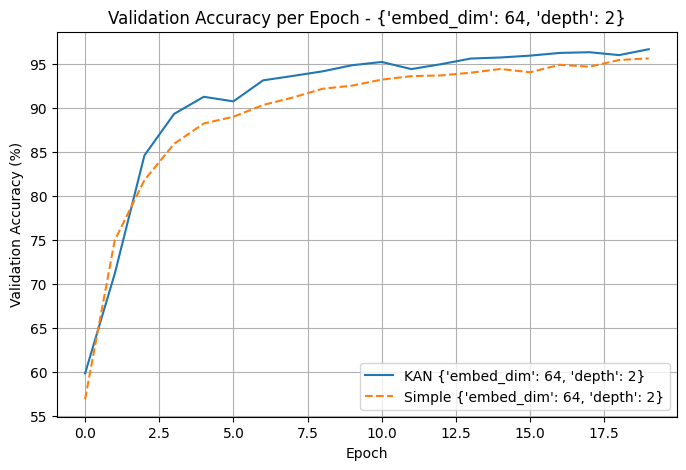

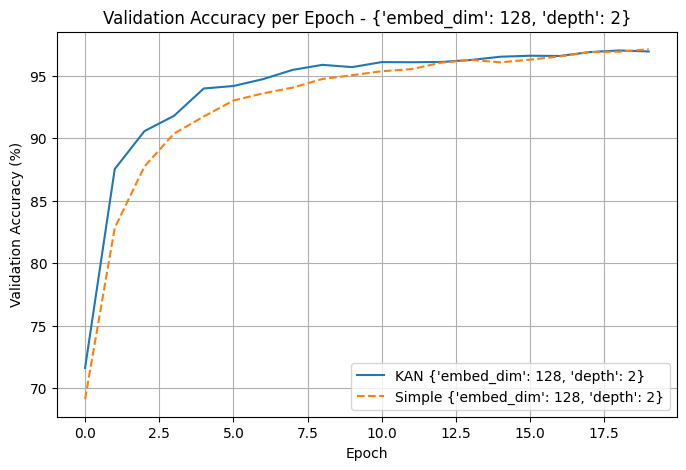

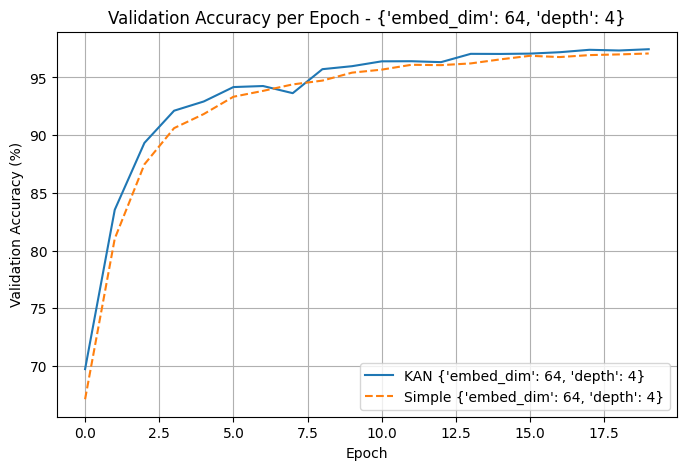

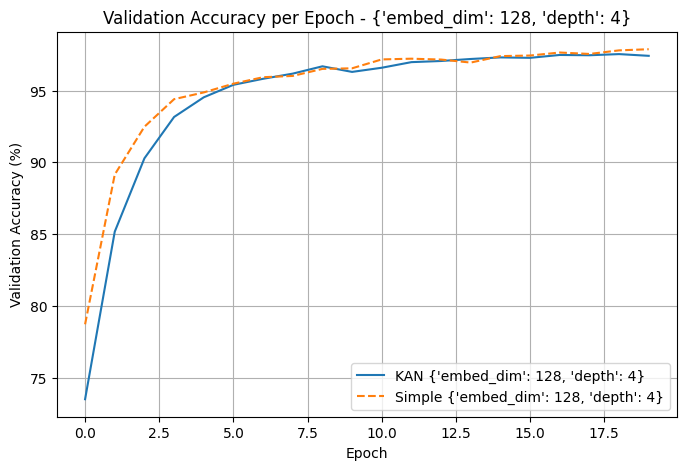

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from KAN Vision Transformer
kan_results = [
    {
        'config': {'embed_dim': 64, 'depth': 2},
        'num_params': 72290,
        'best_val_acc': 96.68,
        'val_accuracies': [59.81, 71.14, 84.6, 89.32, 91.27, 90.75, 93.14, 93.64, 94.16, 94.86, 95.23, 94.42, 94.98, 95.62, 95.74, 95.95, 96.26, 96.34, 96.01, 96.68]
    },
    {
        'config': {'embed_dim': 128, 'depth': 2},
        'num_params': 275490,
        'best_val_acc': 97.01,
        'val_accuracies': [71.63, 87.53, 90.56, 91.79, 93.97, 94.17, 94.72, 95.46, 95.86, 95.68, 96.08, 96.07, 96.09, 96.25, 96.51, 96.59, 96.57, 96.88, 97.01, 96.93]
    },
    {
        'config': {'embed_dim': 64, 'depth': 4},
        'num_params': 139386,
        'best_val_acc': 97.45,
        'val_accuracies': [69.72, 83.53, 89.33, 92.12, 92.92, 94.17, 94.26, 93.64, 95.72, 95.98, 96.40, 96.41, 96.33, 97.05, 97.04, 97.07, 97.19, 97.40, 97.34, 97.45]
    },
    {
        'config': {'embed_dim': 128, 'depth': 4},
        'num_params': 540602,
        'best_val_acc': 97.54,
        'val_accuracies': [73.50, 85.17, 90.28, 93.16, 94.53, 95.40, 95.82, 96.18, 96.69, 96.30, 96.59, 96.98, 97.06, 97.20, 97.31, 97.28, 97.48, 97.46, 97.54, 97.42]
    }
]

# Data from Simple Vision Transformer
simple_results = [
    {
        'config': {'embed_dim': 64, 'depth': 2},
        'num_params': 71946,
        'best_val_acc': 95.64,
        'val_accuracies': [56.87, 74.95, 81.79, 85.92, 88.23, 89.00, 90.34, 91.18, 92.18, 92.54, 93.22, 93.62, 93.70, 94.01, 94.43, 94.06, 94.91, 94.69, 95.45, 95.64]
    },
    {
        'config': {'embed_dim': 128, 'depth': 2},
        'num_params': 274954,
        'best_val_acc': 97.11,
        'val_accuracies': [69.13, 82.83, 87.73, 90.37, 91.73, 93.01, 93.58, 94.04, 94.73, 95.03, 95.35, 95.52, 96.03, 96.26, 96.06, 96.28, 96.53, 96.88, 96.91, 97.11]
    },
    {
        'config': {'embed_dim': 64, 'depth': 4},
        'num_params': 138890,
        'best_val_acc': 97.08,
        'val_accuracies': [67.11, 81.03, 87.47, 90.61, 91.83, 93.33, 93.84, 94.40, 94.73, 95.42, 95.68, 96.10, 96.07, 96.22, 96.57, 96.88, 96.77, 96.94, 97.00, 97.08]
    },
    {
        'config': {'embed_dim': 128, 'depth': 4},
        'num_params': 539914,
        'best_val_acc': 97.88,
        'val_accuracies': [78.72, 89.15, 92.48, 94.40, 94.87, 95.48, 95.93, 96.02, 96.51, 96.55, 97.17, 97.22, 97.16, 96.95, 97.40, 97.44, 97.65, 97.55, 97.80, 97.88]
    }
]

# Generate plots for each configuration
for i in range(len(kan_results)):
    plt.figure(figsize=(8, 5))
    plt.plot(kan_results[i]['val_accuracies'], label=f'KAN {kan_results[i]["config"]}')
    plt.plot(simple_results[i]['val_accuracies'], linestyle='dashed', label=f'Simple {simple_results[i]["config"]}')

    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy (%)")
    plt.title(f"Validation Accuracy per Epoch - {kan_results[i]['config']}")
    plt.legend()
    plt.grid(True)
    plt.show()




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from KAN Vision Transformer
kan_results = [
    {
        'config': {'embed_dim': 64, 'depth': 2},
        'num_params': 72290,
        'best_val_acc': 96.68,
        'avg_epoch_time': 21.54,
        'total_train_time': 430.96,
        'val_accuracies': [59.81, 71.14, 84.6, 89.32, 91.27, 90.75, 93.14, 93.64, 94.16, 94.86, 95.23, 94.42, 94.98, 95.62, 95.74, 95.95, 96.26, 96.34, 96.01, 96.68]
    },
    {
        'config': {'embed_dim': 128, 'depth': 2},
        'num_params': 275490,
        'best_val_acc': 97.01,
        'avg_epoch_time': 21.81,
        'total_train_time': 436.53,
        'val_accuracies': [71.63, 87.53, 90.56, 91.79, 93.97, 94.17, 94.72, 95.46, 95.86, 95.68, 96.08, 96.07, 96.09, 96.25, 96.51, 96.59, 96.57, 96.88, 97.01, 96.93]
    },
    {
        'config': {'embed_dim': 64, 'depth': 4},
        'num_params': 139386,
        'best_val_acc': 97.45,
        'avg_epoch_time': 28.67,
        'total_train_time': 573.72,
        'val_accuracies': [69.72, 83.53, 89.33, 92.12, 92.92, 94.17, 94.26, 93.64, 95.72, 95.98, 96.40, 96.41, 96.33, 97.05, 97.04, 97.07, 97.19, 97.40, 97.34, 97.45]
    },
    {
        'config': {'embed_dim': 128, 'depth': 4},
        'num_params': 540602,
        'best_val_acc': 97.54,
        'avg_epoch_time': 28.93,
        'total_train_time': 578.98,
        'val_accuracies': [73.50, 85.17, 90.28, 93.16, 94.53, 95.40, 95.82, 96.18, 96.69, 96.30, 96.59, 96.98, 97.06, 97.20, 97.31, 97.28, 97.48, 97.46, 97.54, 97.42]
    }
]

# Data from Simple Vision Transformer
simple_results = [
    {
        'config': {'embed_dim': 64, 'depth': 2},
        'num_params': 71946,
        'best_val_acc': 95.64,
        'avg_epoch_time': 21.08,
        'total_train_time': 421.79,
    },
    {
        'config': {'embed_dim': 128, 'depth': 2},
        'num_params': 274954,
        'best_val_acc': 97.11,
        'avg_epoch_time': 21.34,
        'total_train_time': 427.02,
    },
    {
        'config': {'embed_dim': 64, 'depth': 4},
        'num_params': 138890,
        'best_val_acc': 97.08,
        'avg_epoch_time': 27.76,
        'total_train_time': 555.45,
    },
    {
        'config': {'embed_dim': 128, 'depth': 4},
        'num_params': 539914,
        'best_val_acc': 97.88,
        'avg_epoch_time': 28.06,
        'total_train_time': 561.50,
    }
]

# Create a comparison table
data = []
for i in range(len(kan_results)):
    data.append([
        kan_results[i]['config'],
        kan_results[i]['num_params'],
        simple_results[i]['num_params'],
        kan_results[i]['best_val_acc'],
        simple_results[i]['best_val_acc'],
        kan_results[i]['avg_epoch_time'],
        simple_results[i]['avg_epoch_time'],
        kan_results[i]['total_train_time'],
        simple_results[i]['total_train_time']
    ])

# Convert to DataFrame and display
comparison_df = pd.DataFrame(data, columns=['Config', 'KAN Params', 'Simple Params', 'KAN Best Acc (%)', 'Simple Best Acc (%)', 'KAN Avg Epoch Time (s)', 'Simple Avg Epoch Time (s)', 'KAN Train Time (s)', 'Simple Train Time (s)'])
print(comparison_df)


                           Config  KAN Params  Simple Params  \
0   {'embed_dim': 64, 'depth': 2}       72290          71946   
1  {'embed_dim': 128, 'depth': 2}      275490         274954   
2   {'embed_dim': 64, 'depth': 4}      139386         138890   
3  {'embed_dim': 128, 'depth': 4}      540602         539914   

   KAN Best Acc (%)  Simple Best Acc (%)  KAN Avg Epoch Time (s)  \
0             96.68                95.64                   21.54   
1             97.01                97.11                   21.81   
2             97.45                97.08                   28.67   
3             97.54                97.88                   28.93   

   Simple Avg Epoch Time (s)  KAN Train Time (s)  Simple Train Time (s)  
0                      21.08              430.96                 421.79  
1                      21.34              436.53                 427.02  
2                      27.76              573.72                 555.45  
3                      28.06              

NameError: name 'img1' is not defined

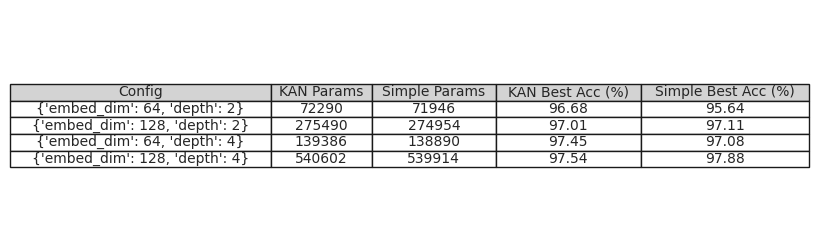

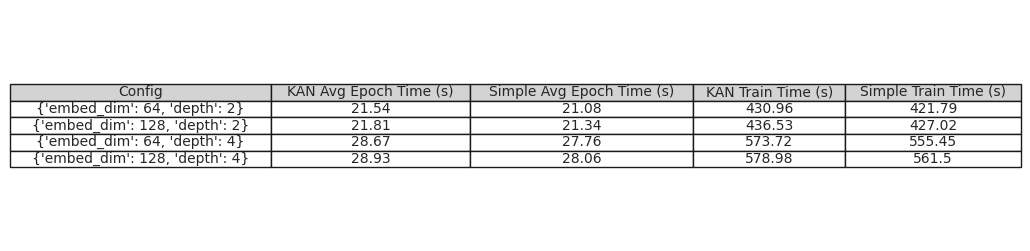

In [ ]:
# Splitting the DataFrame into two parts
df_part1 = df.iloc[:, :5]  # First part (up to 'Simple Best Acc (%)')
df_part2 = df.iloc[:, [0] + list(range(5, len(df.columns)))]  # Second part (rest)

# Function to plot and save a table
def save_table_image(df, filename):
    plt.figure(figsize=(10, 3))  # Adjust figure size
    ax = plt.gca()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    table = plt.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center",
        colColours=["lightgray"] * len(df.columns)  # Header background color
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))



# Save the two tables separately
save_table_image(df_part1, "table_part1.png")
save_table_image(df_part2, "table_part2.png")

# # Display images to user
# img1 = display.Image("/mnt/data/table_part1.png")
# img2 = display.Image("/mnt/data/table_part2.png")

img1, img2


In [ ]:
import pandas as pd

# Data from KAN Vision Transformer (using your first dataset)
kan_results = [
    {
        'config': {'embed_dim': 64, 'depth': 2},
        'num_params': 72290,
        'best_val_acc': 96.68,
        'val_accuracies': [59.81, 71.14, 84.6, 89.32, 91.27, 90.75, 93.14, 93.64, 94.16, 94.86, 95.23, 94.42, 94.98, 95.62, 95.74, 95.95, 96.26, 96.34, 96.01, 96.68]
    },
    {
        'config': {'embed_dim': 128, 'depth': 2},
        'num_params': 275490,
        'best_val_acc': 97.01,
        'val_accuracies': [71.63, 87.53, 90.56, 91.79, 93.97, 94.17, 94.72, 95.46, 95.86, 95.68, 96.08, 96.07, 96.09, 96.25, 96.51, 96.59, 96.57, 96.88, 97.01, 96.93]
    },
    {
        'config': {'embed_dim': 64, 'depth': 4},
        'num_params': 139386,
        'best_val_acc': 97.45,
        'val_accuracies': [69.72, 83.53, 89.33, 92.12, 92.92, 94.17, 94.26, 93.64, 95.72, 95.98, 96.40, 96.41, 96.33, 97.05, 97.04, 97.07, 97.19, 97.40, 97.34, 97.45]
    },
    {
        'config': {'embed_dim': 128, 'depth': 4},
        'num_params': 540602,
        'best_val_acc': 97.54,
        'val_accuracies': [73.50, 85.17, 90.28, 93.16, 94.53, 95.40, 95.82, 96.18, 96.69, 96.30, 96.59, 96.98, 97.06, 97.20, 97.31, 97.28, 97.48, 97.46, 97.54, 97.42]
    }
]

# Data from Simple Vision Transformer (using your first dataset)
simple_results = [
    {
        'config': {'embed_dim': 64, 'depth': 2},
        'num_params': 71946,
        'best_val_acc': 95.64,
        'val_accuracies': [56.87, 74.95, 81.79, 85.92, 88.23, 89.00, 90.34, 91.18, 92.18, 92.54, 93.22, 93.62, 93.70, 94.01, 94.43, 94.06, 94.91, 94.69, 95.45, 95.64]
    },
    {
        'config': {'embed_dim': 128, 'depth': 2},
        'num_params': 274954,
        'best_val_acc': 97.11,
        'val_accuracies': [69.13, 82.83, 87.73, 90.37, 91.73, 93.01, 93.58, 94.04, 94.73, 95.03, 95.35, 95.52, 96.03, 96.26, 96.06, 96.28, 96.53, 96.88, 96.91, 97.11]
    },
    {
        'config': {'embed_dim': 64, 'depth': 4},
        'num_params': 138890,
        'best_val_acc': 97.08,
        'val_accuracies': [67.11, 81.03, 87.47, 90.61, 91.83, 93.33, 93.84, 94.40, 94.73, 95.42, 95.68, 96.10, 96.07, 96.22, 96.57, 96.88, 96.77, 96.94, 97.00, 97.08]
    },
    {
        'config': {'embed_dim': 128, 'depth': 4},
        'num_params': 539914,
        'best_val_acc': 97.88,
        'val_accuracies': [78.72, 89.15, 92.48, 94.40, 94.87, 95.48, 95.93, 96.02, 96.51, 96.55, 97.17, 97.22, 97.16, 96.95, 97.40, 97.44, 97.65, 97.55, 97.80, 97.88]
    }
]

# Function to find the epoch where accuracy reaches a given threshold.
# It returns the epoch number (1-indexed) when the threshold is first reached.
def find_epoch_to_reach(accuracies, threshold):
    for idx, acc in enumerate(accuracies):
        if acc >= threshold:
            return idx + 1  # Convert 0-index to 1-index
    return None  # Returns None if the threshold is never reached

# Prepare the comparison table data
data = []
for i in range(len(kan_results)):
    data.append([
        kan_results[i]['config'],
        kan_results[i]['num_params'],
        simple_results[i]['num_params'],
        kan_results[i]['best_val_acc'],
        simple_results[i]['best_val_acc'],
        find_epoch_to_reach(kan_results[i]['val_accuracies'], 90),
        find_epoch_to_reach(simple_results[i]['val_accuracies'], 90),
        find_epoch_to_reach(kan_results[i]['val_accuracies'], 95),
        find_epoch_to_reach(simple_results[i]['val_accuracies'], 95)
    ])

# Create a DataFrame with appropriate column names
df = pd.DataFrame(data, columns=[
    'Config',
    'KAN Params',
    'Simple Params',
    'KAN Best Acc (%)',
    'Simple Best Acc (%)',
    'KAN Epoch to 90%',
    'Simple Epoch to 90%',
    'KAN Epoch to 95%',
    'Simple Epoch to 95%'
])

# Print the comparison table
print(df)


                           Config  KAN Params  Simple Params  \
0   {'embed_dim': 64, 'depth': 2}       72290          71946   
1  {'embed_dim': 128, 'depth': 2}      275490         274954   
2   {'embed_dim': 64, 'depth': 4}      139386         138890   
3  {'embed_dim': 128, 'depth': 4}      540602         539914   

   KAN Best Acc (%)  Simple Best Acc (%)  KAN Epoch to 90%  \
0             96.68                95.64                 5   
1             97.01                97.11                 3   
2             97.45                97.08                 4   
3             97.54                97.88                 3   

   Simple Epoch to 90%  KAN Epoch to 95%  Simple Epoch to 95%  
0                    7                11                   19  
1                    4                 8                   10  
2                    4                 9                   10  
3                    3                 6                    6  


NameError: name 'img1' is not defined

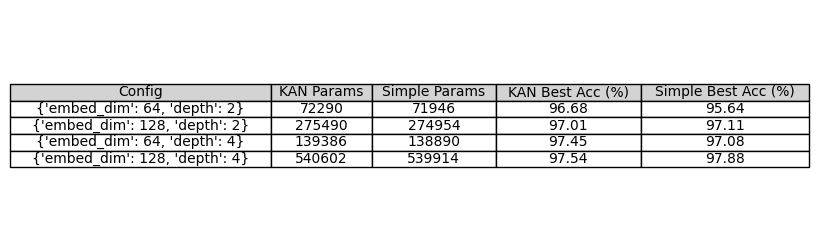

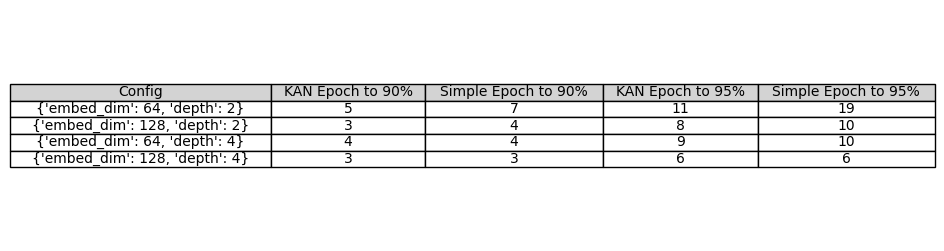

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Splitting the DataFrame into two parts
df_part1 = df.iloc[:, :5]  # First part (up to 'Simple Best Acc (%)')
df_part2 = df.iloc[:, [0] + list(range(5, len(df.columns)))]  # Second part (rest)

# Function to plot and save a table
def save_table_image(df, filename):
    plt.figure(figsize=(10, 3))  # Adjust figure size
    ax = plt.gca()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    table = plt.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center",
        colColours=["lightgray"] * len(df.columns)  # Header background color
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))



# Save the two tables separately
save_table_image(df_part1, "table_part1.png")
save_table_image(df_part2, "table_part2.png")

# # Display images to user
# img1 = display.Image("/mnt/data/table_part1.png")
# img2 = display.Image("/mnt/data/table_part2.png")

img1, img2
